<a href="https://colab.research.google.com/github/hayden-huynh/CSE-5334-TermProject/blob/master/CSE_5334_TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 5334 - Data Mining: Term Project

## About The Project
- Dataset: [Top Reddit Posts and Comments](https://www.kaggle.com/datasets/tushar5harma/topredditcomments?select=Top_Posts.csv)
- Goal: Given a comment of a post, classify which subreddit (Machine Learning, Artificial Intelligence, or Data Science) that it belongs to
- Solution: Naive Bayes Classifier for Text Classification

## Project Steps
1. Download the Top Reddit Posts and Comments [dataset](https://www.kaggle.com/datasets/tushar5harma/topredditcomments?select=Top_Posts.csv) from Kaggle
2. Based on the original dataset, formulate a dataframe consisting of a column of **comment text**, and a column of subreddit class
3. Perform text pre-processing
  - Lower-casing
  - Punctuation removal
  - Tokenization and duplicate word removal
4. Split the data into ***train*** (70%), ***dev*** (20%), and ***test*** (10%) subsets
5. Train the Naive Bayes Classifier
6. Experiment for optimization with **dev** dataset
  - Smoothing
  - Stopword removal
  - Stemming / Lemmatization
7. Conclude final accuracy with **test** dataset

# Download the Dataset

In [ ]:
# Download the Top Reddit Posts & Reviews dataset from Kaggle
# Reference 1 (Ref 1): https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

# Ref 1 starts =====
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download tushar5harma/topredditcomments
! unzip topredditcomments.zip
# ===== Ref 1 ends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
topredditcomments.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  topredditcomments.zip
replace Top_Posts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Top_Posts.csv           
replace Top_Posts_Comments.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Top_Posts_Comments.csv  


# Formulate Comment-Subreddit Dataframe

In [ ]:
import pandas as pd
import numpy as np

top_posts = pd.read_csv("/content/Top_Posts.csv")
top_posts_comments = pd.read_csv("/content/Top_Posts_Comments.csv")

posts_id_class = top_posts[["post_id", "subreddit"]]

# Three classes: "MachineLearning", "datascience", "artificial"
comments = pd.merge(top_posts_comments, posts_id_class, on="post_id")

comments = comments[comments['comment'].notna()]

comments.sample(5)

post_id                                            comment  \
111447   q2wb8u  work a side hustle personal project that you u...   
115471   32ihpe  The question was specifically about newer work...   
84442   10rx6tv                                     yes you should   
104944   v9xme1  These folks probably worked for mbb and the li...   
194090  1174kud  Not part of this conversation but - There is n...   

              subreddit  
111447      datascience  
115471  MachineLearning  
84442       datascience  
104944      datascience  
194090       artificial

# Perform text pre-processing

In [ ]:
# Reference 2 (Ref 2): https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
import string
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

nltk_stopwords = stopwords.words("english")

# nltk.help.upenn_tagset()

# ---------- Lower-casing ----------
# Ref 2 starts =====
comments["comment"] = comments["comment"].apply(lambda c : c.lower())
# ===== Ref 2 ends

# ---------- Tokenization and Duplicate removal ----------
# Ref 2 starts =====
def tokenize(text):
  tokens = re.split("\W+", text)
# ===== Ref 2 ends
  tokens = list(filter(None, tokens))
  return sorted(list(set(tokens)))

# Ref 2 starts =====
comments["tokens"] = comments["comment"].apply(lambda c: tokenize(c))
# ===== Ref 2 ends

# ---------- Stopword removal ----------
# Ref 2 starts =====
def remove_stopwords(words):
  output = [w for w in words if w not in nltk_stopwords]
  return output
# ===== Ref 2 ends

# Ref 2 starts =====
# comments["tokens"] = comments["tokens"].apply(lambda words: remove_stopwords(words))
# ===== Ref 2 ends

# ---------- Punctuation removal ----------
# Ref 2 starts =====
def remove_punc_str(text):
  punc_free = "".join([char for char in text if char not in string.punctuation])
  return punc_free
# ===== Ref 2 ends

def remove_punc_arr(words):
  for i, w in enumerate(words):
    # Ref 2 starts =====
    punc_free = "".join([char for char in w if char not in string.punctuation])
    words[i] = punc_free
    # ===== Ref 2 ends
  return words

# Ref 2 starts =====
comments["tokens"] = comments["tokens"].apply(lambda c: remove_punc_arr(c))
# ===== Ref 2 ends

# ---------- Lemmatization ----------
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag: str):
  if tag.startswith("JJ"):
    return wordnet.ADJ
  elif tag.startswith("NN"):
    return wordnet.NOUN
  elif tag.startswith("RB"):
    return wordnet.ADV
  elif tag.startswith("V"):
    return wordnet.VERB
  else:
    return wordnet.NOUN

def lemmatize_tokens(tokens):
  new_tokens = set()
  for token, tag in nltk.pos_tag(tokens):
    lemma = lemmatizer.lemmatize(token, get_wordnet_pos(tag))
    new_tokens.add(lemma)
  return list(new_tokens)

comments["tokens"] = comments["tokens"].apply(lambda c: lemmatize_tokens(c))

comments.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


post_id                                            comment  \
218727  md1h0x  for real?! this thing is from 2017, that's so ...   
174556  bjbrju  no, i’ve never used it. the 1 cycle policy was...   
202278  wawec9            it’s the love cooking hate dishes thing   
42311   70vuj5                                     it was edited.   
5698    dh2xfs                                   link not opening   

              subreddit                                             tokens  
218727       artificial  [so, real, any, s, 2017, from, the, cool, idea...  
174556  MachineLearning  [jeremy, write, fastai, never, think, use, bec...  
202278      datascience        [hate, s, cook, the, dish, it, thing, love]  
42311   MachineLearning                                     [it, edit, be]  
5698    MachineLearning                                  [open, link, not]

# Split the Dataset

In [ ]:
# Reference 3 (Ref 3): https://stackoverflow.com/questions/43777243/how-to-split-a-dataframe-in-pandas-in-predefined-percentages 

# Ref 3 starts =====
def split_by_fractions(df, fracs, random_state=0):
    remain = df.index.copy().to_frame()
    res = []
    for i in range(len(fracs)):
        fractions_sum = sum(fracs[i:])
        frac = fracs[i]/fractions_sum
        idxs = remain.sample(frac=frac, random_state=random_state).index
        remain=remain.drop(idxs)
        res.append(idxs)
    return [df.loc[idxs] for idxs in res]
# ===== Ref 3 ends

random_state = 1
train, dev, test = split_by_fractions(comments, [0.7, 0.2, 0.1], random_state)
print(train.shape, dev.shape, test.shape)

(156211, 4) (44632, 4) (22316, 4)


# Train the classifier

In [ ]:
from decimal import Decimal

train_ml = train.loc[train["subreddit"] == "MachineLearning"]
train_ds = train.loc[train["subreddit"] == "datascience"]
train_ai = train.loc[train["subreddit"] == "artificial"]

# P(ml), P(ds), and P(ai) priors
p_ml = Decimal(len(train_ml) / len(train))
p_ds = Decimal(len(train_ds) / len(train))
p_ai = Decimal(len(train_ai) / len(train))

print(f'P(ml) = {p_ml}')
print(f'P(ds) = {p_ds}')
print(f'P(ai) = {p_ai}')

P(ml) = 0.427972421916510359363172710800427012145519256591796875
P(ds) = 0.4805679497602601824013390796608291566371917724609375
P(ai) = 0.09145962832322947211327601735320058651268482208251953125


In [ ]:
# Count word occurences

occ_ml = {}
occ_ds = {}
occ_ai = {}

def count_occurrences(occ_dict, df):
  for words in df.loc[:,"tokens"]:
    for w in words:
      if w not in occ_dict.keys():
        occ_dict[w] = 1
      else:
        occ_dict[w] += 1

count_occurrences(occ_ml, train_ml)
count_occurrences(occ_ds, train_ds)
count_occurrences(occ_ai, train_ai)

In [ ]:
# Calculate word probabilities given ml, ds, or ai

probs_ml = {}
probs_ds = {}
probs_ai = {}

def calc_word_likelihood(count, alpha, h):
  if h == "ml":
    return Decimal((count + alpha) / (len(train_ml) + alpha * 3))
  elif h == "ds":
    return Decimal((count + alpha) / (len(train_ds) + alpha * 3))
  elif h == "ai":
    return Decimal((count + alpha) / (len(train_ai) + alpha * 3))

def calc_prob(alpha=0):
  for word, count in occ_ml.items():
    probs_ml[word] = calc_word_likelihood(count, alpha, "ml")
  
  for word, count in occ_ds.items():
    probs_ds[word] = calc_word_likelihood(count, alpha, "ds")

  for word, count in occ_ai.items():
    probs_ai[word] = calc_word_likelihood(count, alpha, "ai")

alpha = 1

calc_prob(alpha)

# Validate with ***dev*** dataset

In [ ]:
import csv
import os

# Function to classify a comment
def classify(comment_words, alpha):
  for w in comment_words:
    if w not in probs_ml.keys():
      probs_ml[w] = calc_word_likelihood(0, alpha, "ml")
    if w not in probs_ds.keys():
      probs_ds[w] = calc_word_likelihood(0, alpha, "ds")
    if w not in probs_ai.keys():
      probs_ai[w] = calc_word_likelihood(0, alpha, "ai")
  
  chance_ml = p_ml
  chance_ds = p_ds
  chance_ai = p_ai
  for w in comment_words:
    chance_ml = chance_ml * probs_ml[w]
    chance_ds = chance_ds * probs_ds[w]
    chance_ai = chance_ai * probs_ai[w]
  
  max_chance = max(chance_ml, chance_ds, chance_ai)

  if max_chance == chance_ml:
    return "MachineLearning"
  elif max_chance == chance_ds:
    return "datascience"
  else:
    return "artificial"
    

# Function to test entire dataset given
def test_accuracy(dataset, alpha, csv_writer=None):
  correct = 0
  
  for index, row in dataset.loc[:,["subreddit", "tokens"]].iterrows():
    result = classify(row["tokens"], alpha)
    if row["subreddit"] == result:
      correct += 1
  
  accuracy = round(correct / len(dataset) * 100, 4)

  if csv_writer != None:
    csv_writer.writerow([alpha, accuracy])
  
  print(f"Successfully classified {correct}/{len(dataset)} ({accuracy}%) correctly")

# ---------- Experiment with Smoothing ----------

# dev_smoothing = open(f"dev_smoothing.csv", "a", newline='')
# dev_smoothing_writer = csv.writer(dev_smoothing)
# if (os.path.getsize(f"/content/dev_smoothing.csv") == 0):
#   dev_smoothing_writer.writerow(["alpha", "accuracy"])

test_accuracy(dev, alpha)

# dev_smoothing.flush()

Successfully classified 31520/44632 (70.622%) correctly


# Conclude final accuracy with ***test*** dataset

In [ ]:
# test_smoothing = open(f'test_smoothing.csv', 'a', newline='')
# test_smoothing_writer = csv.writer(test_smoothing)
# if (os.path.getsize(f"/content/test_smoothing.csv") == 0):
#   dev_smoothing_writer.writerow(["alpha", "accuracy"])

test_accuracy(test, alpha)

# test_smoothing.flush()

Successfully classified 15787/22316 (70.743%) correctly


# Experiment Data Graphs

In [197]:
import matplotlib.pyplot as plt

dev_smoothing = pd.read_csv("/content/dev_smoothing.csv")
test_smoothing = pd.read_csv("/content/test_smoothing.csv")

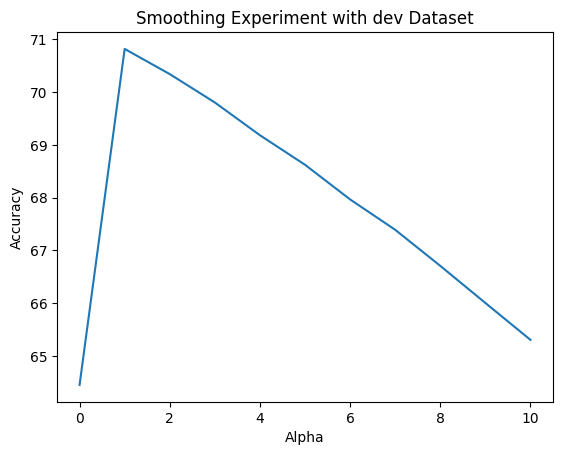

In [198]:
plt.figure()
plt.title('Smoothing Experiment with dev Dataset')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(dev_smoothing['alpha'], dev_smoothing['accuracy'])

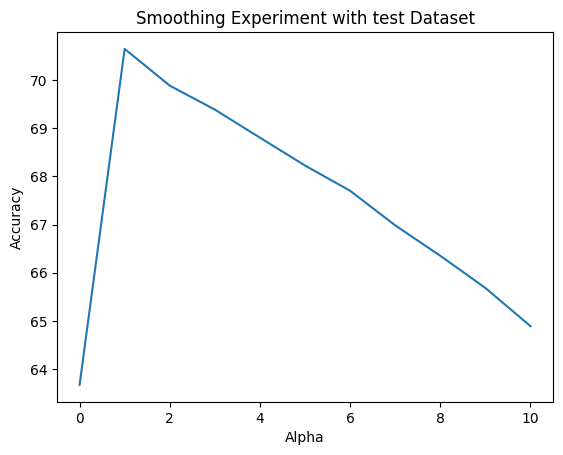

In [199]:
plt.figure()
plt.title('Smoothing Experiment with test Dataset')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(test_smoothing['alpha'], test_smoothing['accuracy'])

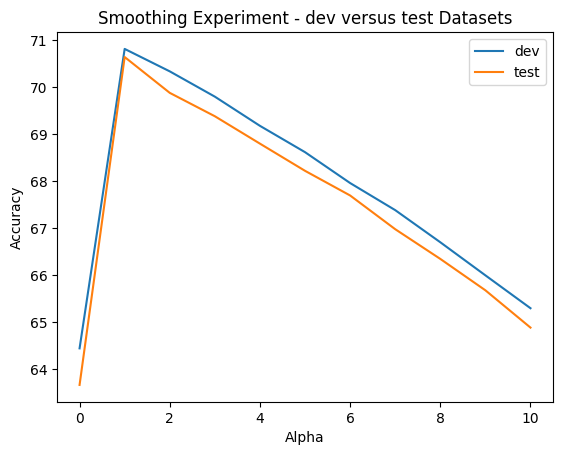

In [200]:
plt.figure()
plt.title("Smoothing Experiment - dev versus test Datasets")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(dev_smoothing['alpha'], dev_smoothing['accuracy'], label="dev")
plt.plot(test_smoothing['alpha'], test_smoothing['accuracy'], label="test")
plt.legend()

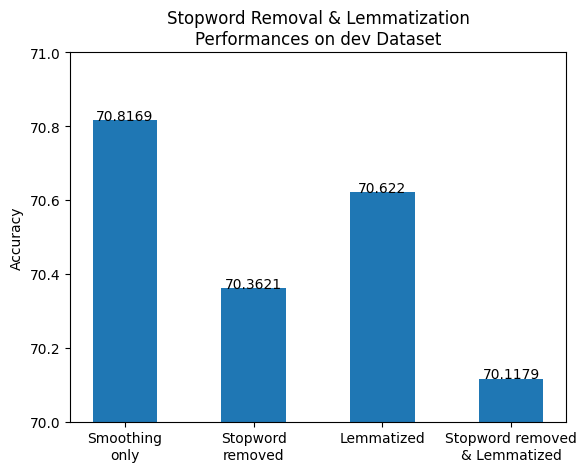

In [217]:
x_labels = ["Smoothing\nonly", "Stopword\nremoved", "Lemmatized", "Stopword removed\n& Lemmatized"]
accuracies = [70.8169, 70.3621, 70.6220, 70.1179]

plt.ylim(70, 71)
plt.title("Stopword Removal & Lemmatization\nPerformances on dev Dataset")
plt.ylabel("Accuracy")
plt.bar(x_labels, accuracies, width=0.5)
for x, y in zip(x_labels, accuracies):
  plt.text(x, y, str(y), ha="center")

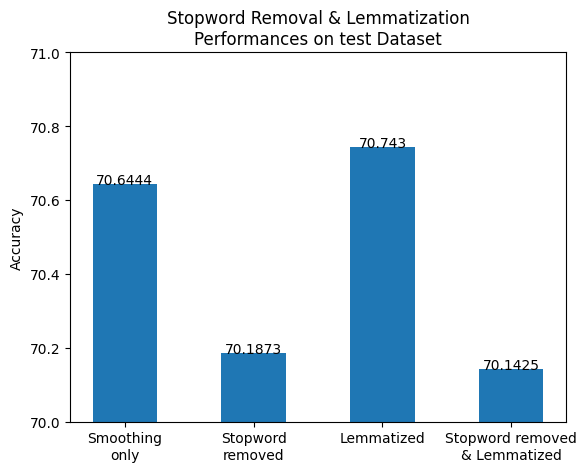

In [218]:
x_labels = ["Smoothing\nonly", "Stopword\nremoved", "Lemmatized", "Stopword removed\n& Lemmatized"]
accuracies = [70.6444, 70.1873, 70.7430, 70.1425]

plt.ylim(70, 71)
plt.title("Stopword Removal & Lemmatization\nPerformances on test Dataset")
plt.ylabel("Accuracy")
plt.bar(x_labels, accuracies, width=0.5)
for x, y in zip(x_labels, accuracies):
  plt.text(x, y, str(y), ha="center")

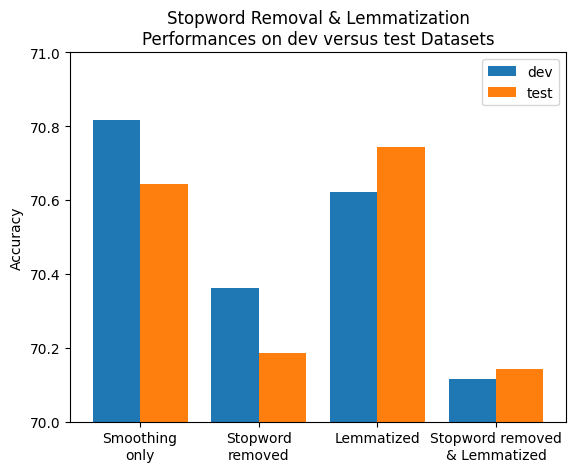

In [222]:
x_labels = ["Smoothing\nonly", "Stopword\nremoved", "Lemmatized", "Stopword removed\n& Lemmatized"]
x_axis = np.arange(len(x_labels))
dev_accuracies = [70.8169, 70.3621, 70.6220, 70.1179]
test_accuracies = [70.6444, 70.1873, 70.7430, 70.1425]

plt.ylim(70, 71)
plt.title("Stopword Removal & Lemmatization\nPerformances on dev versus test Datasets")
plt.xticks(x_axis, x_labels)
plt.ylabel("Accuracy")
plt.bar(x_axis - 0.2, dev_accuracies, width=0.4, label="dev")
plt.bar(x_axis + 0.2, test_accuracies, width=0.4, label="test")
plt.legend()